# Bike Share Toronto Usage Analysis

## Introduction

*This analysis requires the user to download a CSV file that contains the relevant Q3 usage data of Bike Share Toronto. To access that file, please go to the [GitHub Repository](https://github.com/DennisMOTU/CSCI2000U-Assignment-1).*

   Bike Share Toronto is a for-profit organization that offers a bike sharing service in the cities of Toronto and Scarborough. The bike sharing system is composed of three main features: the bike station, which stores bikes until a user takes one, the bikes themselves, and the online app. At present, the system has **7175** bicycles docked in **630** stations across Toronto and part of Scarborough [1].
   
   Bikes can be ridden for up to 45 minutes prior to incurring a small overage fee, and in order to rent bikes users must purchase a membership, which falls into two categories; **Annual**, where a 115 dollar fee is paid for unlimited trips for a year, and **Casual** , which encompasses 72 or 24 hour passes, priced at 15 and 7 dollars respectively [2]. Once a user begins to ride, they can dock the bike at any other station to complete their trip.
   
   Over the course of 2018, data concerning the use of Bike Share was recorded by the Toronto Parking Authority. Each data point, or "trip", recorded information about the start and end point of the trip, the duration, and the membership that was used to take the bike from a dock. The data used in this analysis was taken from the service City of Toronto's open data service, found [here](https://open.toronto.ca/dataset/bike-share-toronto-ridership-data/) [3]. 
   
   Due to the convenient and inexpensive nature of Bike Share for getting people around the city in short trips, I wanted to investigate the nature of how people used the service. How long do people generally ride the bikes? Is usership higher in certain areas relative to others? How does the urban density of an area impact the use of the Bike Share system? Are there certain relationships between the membership people have and their use of the system? These are all questions which this analysis will seek to answer.

## Analyses

##### Importing CSV data, and the first look
    
To begin, the csv file "Bike Share Toronto Ridership_Q3 2018" is imported into the dataframe "bikes". An inital overview of the dataframe shows that it contains data relating to 822536 unique trips made on the Bike Share system in the third quarter of 2018. Initially, data for each trip encompasses an ID for the trip, it's duration in seconds, the ID of the station the bike was undocked from, the start time of the trip, the name of the departure station, and similar information concerning the destination, as well as the type of user that took the trip.
    

In [1]:
import pandas as pd

bikes = pd.read_csv('Bike_Share_Toronto_Ridership_Q3_2018.csv')
bikes

,trip_id,trip_duration_seconds,from_station_id,trip_start_time,from_station_name,trip_stop_time,to_station_id,to_station_name,user_type
0,3244396,528,7254,7/1/2018 0:00,Borden St / Bloor St W - SMART,7/1/2018 0:08,7140,Macpherson Ave / Spadina Rd,Annual Member
1,3244398,570,7031,7/1/2018 0:00,Jarvis St / Isabella St,7/1/2018 0:09,7167,Queen St E / George St (Moss Park),Annual Member
2,3244397,368,7286,7/1/2018 0:00,Gerrard St E / Broadview - SMART,7/1/2018 0:06,7286,Gerrard St E / Broadview - SMART,Casual Member
3,3244399,1147,7248,7/1/2018 0:00,Baldwin Ave / Spadina Ave - SMART,7/1/2018 0:19,7020,Phoebe St / Spadina Ave,Annual Member
4,3244400,730,7207,7/1/2018 0:02,Dundas St W / Crawford St,7/1/2018 0:14,7000,Fort York Blvd / Capreol Ct,Annual Member
...,...,...,...,...,...,...,...,...,...
822531,4158587,1724,7195,9/30/2018 23:47,Ulster St / Bathurst St,10/1/2018 0:16,7195,Ulster St / Bathurst St,Annual Member
822532,4158588,1632,7195,9/30/2018 23:49,Ulster St / Bathurst St,10/1/2018 0:16,7195,Ulster St / Bathurst St,Annual Member
822533,4158589,162,7121,9/30/2018 23:53,Jarvis St / Dundas St E,9/30/2018 23:55,7038,Dundas St W / Yonge St,Annual Member
822534,4158590,474,7140,9/30/2018 23:53,Macpherson Ave / Spadina Rd,10/1/2018 0:01,7281,Charles St W / Balmuto St - SMART,Annual Member


In [2]:
bikes['trip_duration_seconds'] = bikes['trip_duration_seconds'].div(60)
bikes.drop(['trip_id','from_station_id','to_station_id','trip_stop_time'], axis = 1, inplace = True)
bikes.columns = ['trip duration (minutes)', 'start time', 'departure station','arrival station','membership']

bikes

,trip duration (minutes),start time,departure station,arrival station,membership
0,8.800000,7/1/2018 0:00,Borden St / Bloor St W - SMART,Macpherson Ave / Spadina Rd,Annual Member
1,9.500000,7/1/2018 0:00,Jarvis St / Isabella St,Queen St E / George St (Moss Park),Annual Member
2,6.133333,7/1/2018 0:00,Gerrard St E / Broadview - SMART,Gerrard St E / Broadview - SMART,Casual Member
3,19.116667,7/1/2018 0:00,Baldwin Ave / Spadina Ave - SMART,Phoebe St / Spadina Ave,Annual Member
4,12.166667,7/1/2018 0:02,Dundas St W / Crawford St,Fort York Blvd / Capreol Ct,Annual Member
...,...,...,...,...,...
822531,28.733333,9/30/2018 23:47,Ulster St / Bathurst St,Ulster St / Bathurst St,Annual Member
822532,27.200000,9/30/2018 23:49,Ulster St / Bathurst St,Ulster St / Bathurst St,Annual Member
822533,2.700000,9/30/2018 23:53,Jarvis St / Dundas St E,Dundas St W / Yonge St,Annual Member
822534,7.900000,9/30/2018 23:53,Macpherson Ave / Spadina Rd,Charles St W / Balmuto St - SMART,Annual Member


#### Pruning and reformatting data

The csv data in it's original form contained some values that were not relevant to the present line of inquiry. As such, they were dropped from the data frame, and the remaining column headers were given more intuitive names for easier readability. 

In [3]:
bikes = bikes.replace({'membership': {'Annual Member': 1, 'Casual Member': 0}})

A dictionary-style value replacement was made for the two membership classes to better integrate these values into future analysis.

#### Area-specific data filtering

To learn more about the usage of the Bike Share network, it would be useful to analyse not just the data of every trip made, but also subsets of that master data where the trip began in a certain neighborhood or area. New dataframes were made for four separate neighborhoods in the city of Toronto; Jarvis, Queens Quay, Harrison, and Davisville.

To filter the data, any departure station value that contained a substring matching a specified string in the contains() function was appended to the relevant dataframe. In doing so, a number of stations are included as the departure stations of trips, which is useful for assessing the activity in an entire area, rather than one intersection. 

In [4]:
jarvis = bikes[bikes['departure station'].str.contains('Jarvis')]
jarvis

,trip duration (minutes),start time,departure station,arrival station,membership
1,9.500000,7/1/2018 0:00,Jarvis St / Isabella St,Queen St E / George St (Moss Park),1
13,14.116667,7/1/2018 0:07,Jarvis St / Isabella St,Yonge St / Harbour St,1
88,2.433333,7/1/2018 0:26,King St E / Jarvis St,Princess St / Adelaide St E,1
100,4.150000,7/1/2018 0:34,Richmond St E / Jarvis St Green P,Queen St E / Berkeley St,1
168,9.233333,7/1/2018 1:03,Jarvis St / Dundas St E,Dundas St E / Regent Park Blvd,1
...,...,...,...,...,...
822432,5.900000,9/30/2018 21:28,Jarvis St / Isabella St,Parliament St / Aberdeen Ave,1
822467,3.583333,9/30/2018 21:59,Jarvis St / Isabella St,Granby St / Church St - SMART,1
822510,7.833333,9/30/2018 22:48,Jarvis St / Carlton St,Queen St E / Sackville St,1
822523,5.166667,9/30/2018 23:26,Lower Jarvis St / The Esplanade,Cherry St / Mill St,0


In [5]:
quay = bikes[bikes['departure station'].str.contains('Queens Quay')]
quay

,trip duration (minutes),start time,departure station,arrival station,membership
15,15.550000,7/1/2018 0:07,Queens Quay / Yonge St,Church St / Dundas St E - SMART,1
19,14.666667,7/1/2018 0:08,Queens Quay / Yonge St,Church St / Dundas St E - SMART,1
47,21.633333,7/1/2018 0:14,Queens Quay W / Lower Simcoe St,Lakeshore Blvd W / The Boulevard Club,1
77,34.733333,7/1/2018 0:22,Queens Quay W / Dan Leckie Way,Queens Quay W / Lower Simcoe St,0
80,31.200000,7/1/2018 0:23,Queens Quay W / Dan Leckie Way,Ontario Place Blvd / Lakeshore Blvd W,1
...,...,...,...,...,...
822404,12.700000,9/30/2018 21:16,York St / Queens Quay W,York St / Queens Quay W,1
822438,34.433333,9/30/2018 21:29,Queens Quay W / Lower Simcoe St,Baldwin Ave / Spadina Ave - SMART,1
822488,13.550000,9/30/2018 22:25,York St / Queens Quay W,Simcoe St / Michael Sweet Ave,0
822506,18.616667,9/30/2018 22:45,Queens Quay W / Lower Simcoe St,Queens Quay W / Lower Simcoe St,0


In [6]:
harrison = bikes[bikes['departure station'].str.contains('Harrison')]
harrison

,trip duration (minutes),start time,departure station,arrival station,membership
1184,28.266667,7/1/2018 11:15,Ossington Ave / Harrison St,York St / Queens Quay W,0
1186,28.216667,7/1/2018 11:15,Ossington Ave / Harrison St,York St / Queens Quay W,0
2178,10.266667,7/1/2018 13:26,Dovercourt Rd / Harrison St (Green P) - SMART,Euclid Ave / Bloor St W,1
3021,13.283333,7/1/2018 15:10,Ossington Ave / Harrison St,Huron/ Harbord St,1
4359,25.483333,7/1/2018 17:45,Dovercourt Rd / Harrison St (Green P) - SMART,Dockside Dr / Queens Quay E (Sugar Beach),1
...,...,...,...,...,...
818150,13.966667,9/30/2018 2:30,Dovercourt Rd / Harrison St (Green P) - SMART,Kendal Ave / Spadina Rd,1
818967,20.950000,9/30/2018 10:46,Ossington Ave / Harrison St,Richmond St E / Jarvis St Green P,1
820711,15.416667,9/30/2018 15:39,Ossington Ave / Harrison St,McGill St / Church St,1
821073,15.216667,9/30/2018 16:35,Ossington Ave / Harrison St,Bay St / College St (East Side),1


In [7]:
davisville = bikes[bikes['departure station'].str.contains('Davisville')]
davisville

,trip duration (minutes),start time,departure station,arrival station,membership
498330,37.550000,8/24/2018 12:57,Yonge St / Davisville Ave,Elizabeth St / Edward St (Bus Terminal),0
498337,41.100000,8/24/2018 12:58,Yonge St / Davisville Ave,Walton St / Elizabeth St - SMART,0
499007,12.866667,8/24/2018 14:14,Yonge St / Davisville Ave,Yonge St / Yorkville Ave,1
499564,30.416667,8/24/2018 15:13,Yonge St / Davisville Ave,Yonge St / Yorkville Ave,1
499566,29.916667,8/24/2018 15:13,Yonge St / Davisville Ave,Yonge St / Yorkville Ave,1
...,...,...,...,...,...
819261,22.300000,9/30/2018 11:44,Yonge St / Davisville Ave,Amelia St. / Sumach St.,0
819334,18.216667,9/30/2018 11:59,Yonge St / Davisville Ave,The Royal Ontario Museum (Bloor St Entrance),1
819335,18.016667,9/30/2018 11:59,Yonge St / Davisville Ave,The Royal Ontario Museum (Bloor St Entrance),1
820627,24.316667,9/30/2018 15:26,Yonge St / Davisville Ave,The Royal Ontario Museum (Bloor St Entrance),1


Each dataframe has been created, and already yields some preliminary information. For instance, it is now understood that, of the four neighborhoods, Queens Quay had the greatest amount of activity, with roughly 65000 trips being made from stations in that area.

#### Membership data

The type of membership that users have may have an impact on their useage of the Bike Share system, so it would be useful to understand what proportions of trips were made by Annual and Casual memberships. Data on individual users was not collected as this data is anonymous, but useful inferences can still be made. 

First, the overall proportions of each membership classes' trips is calculated for the entire data set by counting the occurrences of 1's and 0's, then calculating the proportion of trips made by each class of membership. 

In [8]:
bikes['membership'].value_counts(normalize=True)*100

1    77.005019
0    22.994981
Name: membership, dtype: float64

In [9]:
quay['membership'].value_counts(normalize=True)*100

1    54.559007
0    45.440993
Name: membership, dtype: float64

In [10]:
jarvis['membership'].value_counts(normalize=True)*100

1    79.912485
0    20.087515
Name: membership, dtype: float64

In [11]:
harrison['membership'].value_counts(normalize=True)*100

1    85.552826
0    14.447174
Name: membership, dtype: float64

In [12]:
davisville['membership'].value_counts(normalize=True)*100

1    78.04878
0    21.95122
Name: membership, dtype: float64

#### Visualization of trip durations

When analysing the use of the Bike Share network, a key piece of information is the amount of time that a person is riding a bike for. In general, trip durations would not exceed 45 minutes, as an overage fee applies for any duration in excess of that time, but a small proportion of trips exceed this slightly. To analyse the data concerning trip duration, histograms are used to assess the distribution of durations. 

First, the overall distribution of durations for the entire Bike Share network is produced. Subsequently, each individual neighborhood has it's distribution visualised with a histogram.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D9120A5D90>]],
      dtype=object)

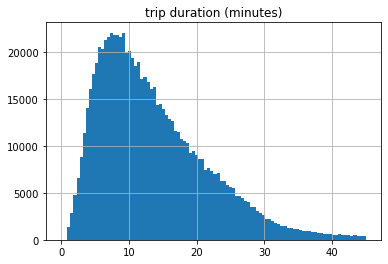

In [13]:
bikes.hist(column = 'trip duration (minutes)', bins = 100, range=[0,45])


In [14]:
bikes.groupby('membership').mean()

,trip duration (minutes)
membership,
0,31.835512
1,13.123103


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D9127F29D0>]],
      dtype=object)

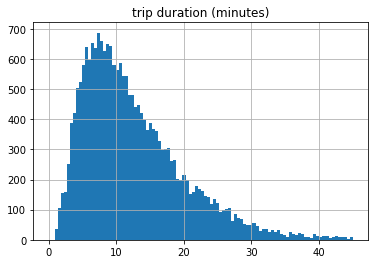

In [15]:
 jarvis.hist(column = 'trip duration (minutes)', bins = 100, range=[0,45])

In [16]:
jarvis.groupby('membership').mean()

,trip duration (minutes)
membership,
0,28.807768
1,12.104828


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D9119D18E0>]],
      dtype=object)

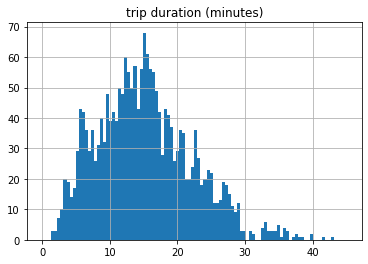

In [17]:
harrison.hist(column = 'trip duration (minutes)', bins = 100, range=[0,45])

In [18]:
harrison.groupby('membership').mean()

,trip duration (minutes)
membership,
0,21.939683
1,15.289393


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D911B6D580>]],
      dtype=object)

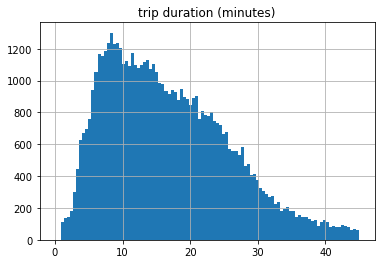

In [19]:
quay.hist(column = 'trip duration (minutes)', bins = 100, range=[0,45])

In [20]:
quay.groupby('membership').mean()

,trip duration (minutes)
membership,
0,42.062931
1,17.870665


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D911C8C3D0>]],
      dtype=object)

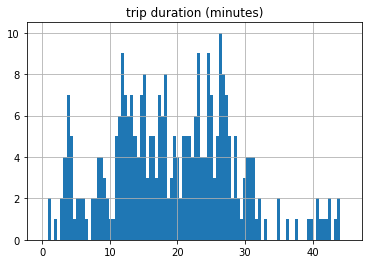

In [21]:
davisville.hist(column = 'trip duration (minutes)', bins = 100, range=[0,45])

In [22]:
davisville.groupby('membership').mean()

,trip duration (minutes)
membership,
0,41.95000
1,20.02806


#### Membership-specific data

Earlier, integer values were assigned to the two types of memberships a trip could be taken under. Now, that mapping of values will be used to assess some data relevant to specific membership cases. Firstly, new dataframes will house the trips made by Annual and Casual memberships. The data in those structures will then be used to find both the total duration of all trips made using the respective membership, and as well the mean duration of the trips. 

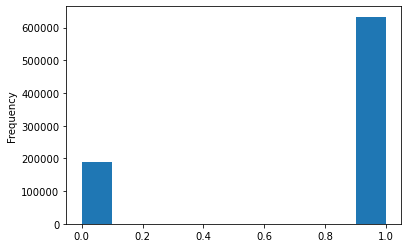

In [23]:
memberships = bikes['membership']
proportion_of_memberships = memberships.plot(kind = 'hist')

In [24]:
annual = bikes[bikes.membership == 1]
annual

,trip duration (minutes),start time,departure station,arrival station,membership
0,8.800000,7/1/2018 0:00,Borden St / Bloor St W - SMART,Macpherson Ave / Spadina Rd,1
1,9.500000,7/1/2018 0:00,Jarvis St / Isabella St,Queen St E / George St (Moss Park),1
3,19.116667,7/1/2018 0:00,Baldwin Ave / Spadina Ave - SMART,Phoebe St / Spadina Ave,1
4,12.166667,7/1/2018 0:02,Dundas St W / Crawford St,Fort York Blvd / Capreol Ct,1
6,10.200000,7/1/2018 0:03,Bloor GO / UP Station (West Toronto Railpath),College St / Crawford St,1
...,...,...,...,...,...
822531,28.733333,9/30/2018 23:47,Ulster St / Bathurst St,Ulster St / Bathurst St,1
822532,27.200000,9/30/2018 23:49,Ulster St / Bathurst St,Ulster St / Bathurst St,1
822533,2.700000,9/30/2018 23:53,Jarvis St / Dundas St E,Dundas St W / Yonge St,1
822534,7.900000,9/30/2018 23:53,Macpherson Ave / Spadina Rd,Charles St W / Balmuto St - SMART,1


In [25]:
casual = bikes[bikes.membership == 0]
casual

,trip duration (minutes),start time,departure station,arrival station,membership
2,6.133333,7/1/2018 0:00,Gerrard St E / Broadview - SMART,Gerrard St E / Broadview - SMART,0
5,14.450000,7/1/2018 0:03,Front St W / University Ave (1),Augusta Ave / Denison Sq,0
16,5.466667,7/1/2018 0:08,Spadina Ave / Adelaide St W,Widmer St / Adelaide St W,0
17,23.366667,7/1/2018 0:08,Madison Ave / Bloor St W,457 King St. W. at Spadina,0
18,22.416667,7/1/2018 0:08,Madison Ave / Bloor St W,457 King St. W. at Spadina,0
...,...,...,...,...,...
822506,18.616667,9/30/2018 22:45,Queens Quay W / Lower Simcoe St,Queens Quay W / Lower Simcoe St,0
822507,18.183333,9/30/2018 22:45,Queens Quay W / Lower Simcoe St,Queens Quay W / Lower Simcoe St,0
822517,24.416667,9/30/2018 23:10,The Royal Ontario Museum (Bloor St Entrance),College St / Huron St,0
822523,5.166667,9/30/2018 23:26,Lower Jarvis St / The Esplanade,Cherry St / Mill St,0


In [26]:
hours_casual = casual['trip duration (minutes)'].sum()/60

In [27]:
hours_annual = annual['trip duration (minutes)'].sum()/60

In [28]:
bikes.groupby('membership').mean()

,trip duration (minutes)
membership,
0,31.835512
1,13.123103


# Discussion

With the data concerning membership and trip duration, now some inferences can be made regarding the usage of the Bike Share Toronto system.

#### Membership

As previously touched-upon, there are two memberships that can be obtained by users to grant access to the Bike Share infrastructure. In Q3 of 2018, **633394** trips were made by users who had Annual memberships, while **189142** were made by users with Casual memberships. 

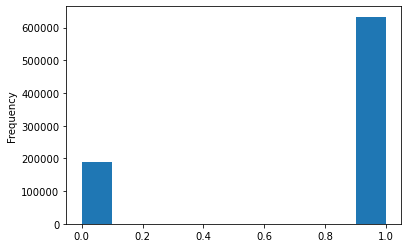

In [29]:
memberships = bikes['membership']
proportion_of_memberships = memberships.plot(kind = 'hist')

In the above visualization, one can note the disparity of the number of trips made by each class of membership (Casual memberships are represented by the left bar, while Annual memberships are represented by that on the right.)

Clearly, the majority of trips made using Bike Share Toronto are made by users who bought an Annual membership, which, given the nature of the memberships, stands to reason. If a person believes that they will use Bike Share infrastructure on even a semi-regular basis, the annual membership offers good value, costing 32 cents per day [3]. This cost makes it possible to use Bike Share as a regular means of transport, much like a car, especially in a dense community like Toronto, where one would not have to ride for long before accessing many amenities or secondary transit nodes. 

In [30]:
print('Number of hours ridden with casual membership: ',hours_casual, '\nNumber of hours ridden with annual membership: ', hours_annual)

Number of hours ridden with casual membership:  100357.20583333333 
Number of hours ridden with annual membership:  138534.91694444444


Unsurprisingly, the total number of hours that bikes were used with an Annual membership was also higher than the time where Casual memberships were used. If users have Annual memberships, a good assumption to make would be that they would make more trips using the Bike Share system than those who purchase Casual memberships, and the sum of the duration of all trips would be greater for the Annual membership class.

In [31]:
bikes.groupby('membership').mean()

,trip duration (minutes)
membership,
0,31.835512
1,13.123103


However, an interesting feature of the data is revealed when the mean trip duration for each membership class is computed. While trips made using the Annual membership were on average ~13 minutes long, trips made with Casual memberships were ~31 minutes long on average. This means that trips made by people with Casual memberships are over twice as long on average as those with Annual memberships. Why does this difference exist? It would be useful to understand the specific usage of the Bike Share system in certain areas to explain why.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D912167E80>]],
      dtype=object)

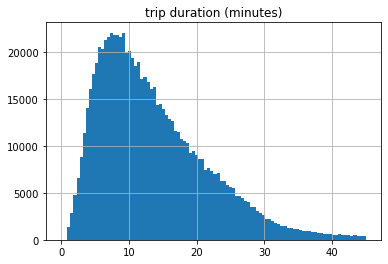

In [32]:
bikes.hist(column = 'trip duration (minutes)', bins = 100, range=[0,45])

In [33]:
bikes['membership'].value_counts(normalize=True)*100

1    77.005019
0    22.994981
Name: membership, dtype: float64

As can be seen with the above data visualization, the data of all trip durations made in Q3 follows a right-skewed distribution, with the right tail concentrating up to the duration of around 9 minutes, with the number of trips with greater durations decreasing subsequently. This histogram is indicative that the general usage of the Bike Share system is for short trips, which is in line with what the stated purpose of the company is. Further, it is important to note that with **77%** of all trips being made by Annual memberships, the distribution is skewed towards that mean trip duration.

#### Trip duration

While it has been shown that, on average, the use of an Annual membership correlates with a lower trip duration than with a Casual membership, is this the case in every area where the Bike Share network exists?

The Bike Share Toronto system covers the entirety of the city east of the Humber River, south of Highway 401, and west of the Don River (though in recent years the system has grown to far exceed these boundaries, in particular moving as far east as Scarborough). A question arises - how does the usage of Bike Share vary based on geographic factors?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D9119E9FA0>]],
      dtype=object)

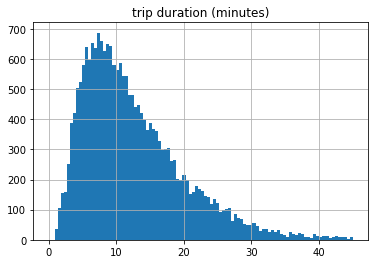

In [34]:
 jarvis.hist(column = 'trip duration (minutes)', bins = 100, range=[0,45])

##### Jarvis

The Jarvis neighborhood lies approximately 1km east of Queen's Park in downtown Toronto, and is a dense urban area with most residences existing in mid- and high-rise blocks. In Q3 of 2018, **21939** trips were made from stations in the Jarvis area. Of those trips, **79.9%** were made with Annual memberships, while the remainder were made by Casual memberships. The distribution of the trip durations generally follows that of the data set as a whole. 

This data makes sense, as the population and business density of the Jarvis neighborhood permits most daily activities, like connecting to public transit and accessing businesses, to be made in short trips. Indeed, the mean Annual membership trip duration was 12.1 minutes, where the Casual trip duration mean was 28.8 minutes, roughly in line with the means seen in the master data.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D919C07A00>]],
      dtype=object)

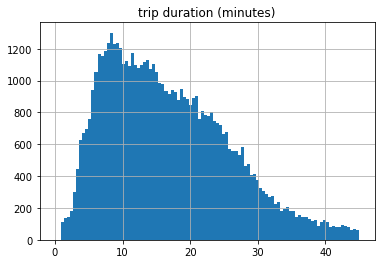

In [35]:
quay.hist(column = 'trip duration (minutes)', bins = 100, range=[0,45])

##### Queens Quay

The Queens Quay neighborhood, also known as the Waterfront, sits on the shoreline of Lake Ontario, and is a very dense urban area characterized by it's large number of very high-rise buildings. In Q3, **65069** trips were made from stations in the Queens Quay area, which is very popular with tourists and often is the site of major public events. This popularity is reflected in the fact that only **54.6%** of trips made originating in this area were made by Annual membership holders. The larger proportion of Casual membership use, **45.4%**, suggests a greater proportion of trips were made by users who did not intend to use the Bike Share network over a long term, such as users from outside the city. As well, the mean trip duration for Casual use was 42 minutes, indicating that Casual users favoured longer trips, covering a greater distance, where Annual membership use remained lower, at ~18 minutes.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D912230940>]],
      dtype=object)

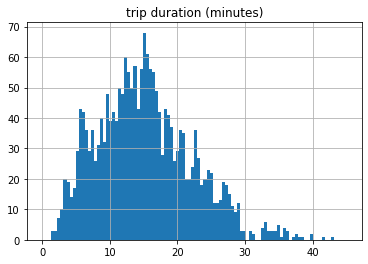

In [36]:
harrison.hist(column = 'trip duration (minutes)', bins = 100, range=[0,45])

##### Harrison

Located 0.6km northwest of Trinity Bellwoods Park, Harrison is a medium density neighborhood, made up mostly by single family residences and low-rise buildings. **2035** trips originating in Harrison were made in Q3 of 2018, with **85.6%** of trips being made by users with Annual memberships, lasting for a mean duration of 15.3 minutes. The high proportion of trips made by Annual memberships is reflected in the distribution, which more closely follows a normal pattern as opposed to the right-skewed distributions of data from Queens Quay and Jarvis.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D91BCC77F0>]],
      dtype=object)

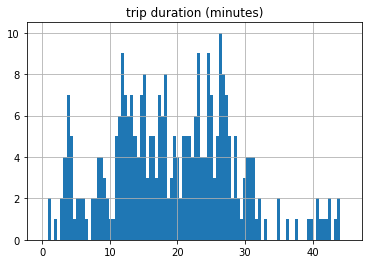

In [37]:
davisville.hist(column = 'trip duration (minutes)', bins = 100, range=[0,45])

##### Davisville 

Davisville is a low density neighborhood located in the east end of York, made up mostly of detached single family residences. In Q3, **328** trips originated in Davisville, **78%** of which were made by Annual membership users. The trip duration distribution did not closely follow a normal nor right-skewed distribution, and the mean trip durations were 20 minutes and 42 minutes for Annual and Casual users respectively. Interestingly, both classes of users made trips that lasted well above the global mean trip durations.

### Factors impacting usage

As seen above, the usage of the Bike Share system varies considerably relative to the geography of the assessed area. In areas which have a high population density, such as Jarvis, more trips are made, and trips are generally shorter. In areas such as Queens Quay, where there are many attractions to users who may be arriving from outside the city, the proportion of trips made with Casual memberships is considerably higher than those areas which are primarily residential, where the overwhelming majority of trips are made by users with Annual memberships. 

###### Low density areas

In general, areas with a lower population density, such as Harrison and Davisville, see fewer trips originating from them than areas with high population density. As well, low density areas tend to have trips which are longer overall, mostly made by users with Annual memberships. The possible inverse relationship between population density and trip length may be explained by the fact that, unlike in high density areas closer to the downtown core, businesses and transit links are generally further-removed from residential areas, requiring longer rides to access them. As well, the lower-density nature of these communities is more hostile to cycling, as trips are inherently longer, and most routes for cycling take place on roads without dedicated bike lanes. 

As such, fewer trips are to be expected, as more users would not be willing to use the Bike Share network where there are fewer stations to access, the road infrastructure is more hostile, and distances to access amenities are longer. However, those users who do use the network would ride for longer durations, skewing the data towards longer durations than downtown areas, where trips can be shorter.

###### High density areas

Conversely, in downtown areas where the overall density of population and businesses are greater, a cyclist would not have to ride for as long a duration to access common destinations as their counterparts in the northern areas would. Furthermore, a greater density of stations allows for less rigourously-planned trips to be made, as essentially every street intersection will have a Bike Share station where a bike can be parked. 

In this regard, the environment is more conducive to the regular use of the Bike Share network, as more streets have protected bike lanes and trips can be shorter in duration. Indeed, the data shows that trip durations for Annual membership holders are closely-aligned to the global mean of ~13 minutes. Ergo, it can be inferred that there exists a positive correlation between population density and the number of trips made, but equally there exists a negative correlation between population density and trip duration. 

In short, this can possibly be explained by the factor of the hostility (or lack thereof) of the environment of an area in which the Bike Share system operates. In the outlying areas of Toronto, communities are not as well-designed for cycling as a means of transport, where distances between residences and amenities are longer, and the actual design of streets are not optimized for the cooperation of bikes and cars, meaning that fewer trips will be made with Bike Share, and those trips that are made will be longer. 

Conversely, in the downtown, where amenities are often very close to residences, and where the prevalence of wide sidewalks and protected bike lanes (even dedicated roads specifically for bicycles, in the case of the Queens Quay area) create a positive environment for cyclists, encouraging more and more efficient use of the Bike Share system.

###### Casual membership cases

One interesting feature of the dataset lies in the fact that, across all data sets, the proportion of trips made by Casual memberships was lower than that of Annual memberships, yet the mean trip duration of Casual trips is significantly higher than that of Annual membership trips. Indeed, in areas such as Queens Quay, the difference between the two mean times is considerable. One possible explanation for the positive correlation between Casual membership and trip duration lies in the notion of the novelty factor of the Bike Share system. 

In areas where people are likely to travel within Toronto, particularly the downtown, the positive environment for cycling means that the Bike Share system is actually less expensive to use over short durations than other methods of transport, such as use of the TTC system (a Presto pass for 24 hours is twice as expensive as a 24h Casual membership with Bike Share Toronto [4]). Ergo, it is more economical to use the Bike Share system, and for users who may want to get to a more varied set of destinations than Annual users, trip durations will naturally be longer. 

As such, a possible explanation for the longer mean duration of trips made by Casual membership holders is that the users want to travel to a larger set of destinations than Annual users who travel to a smaller set of destinations more often, requiring riding for a longer time. This argument is supported by the fact that, though Casual trips are longer on average, the total number of hours ridden by Casual membership users is still considerably lower than that ridden by Annual users. The shorter trips occur much more often, and as such still consitute the majority of usage of the Bike Share Toronto system. 

### Conclusions

In the course of analysing the usage data concerning Bike Share Toronto, some rather intuitive patterns have emerged. Modelling of the data has shown that, for users who use the system over the long term, there exists a proportionate relationship between the general density of an area and the number of trips originating in it. Furthermore, the data analysis has revealed that there is an inversely proportionate relationship between the density of an area and the mean duration of trips originating in it.

Regarding the class of users who use the system over short terms of 1-3 days, mean trip durations are universally higher in every sample area compared to trips made by Annual membership holders. As well, the density of an area proportionally correlates to the number of trips made by Casual membership holders.

Again, while the results of the analysis may be reasonably intuitive, it is worth considering the underlying factors which contribute to the nature of the usage of Bike Share Toronto, such as the environmental impact on whether or not people use the service. By understanding how various factors impact the system, it can be better optimized to maximize convenience, efficiency, and usership.

## References

[1] “Discover our 625 stations - system map,” Bike Share Toronto, 02-Sep-2022. [Online]. Available: https://bikesharetoronto.com/system-map/. [Accessed: 26-Nov-2022]. 

[2] “Get a pass and ride - pricing details,” Bike Share Toronto, 11-Aug-2022. [Online]. Available: https://bikesharetoronto.com/pricing/. [Accessed: 26-Nov-2022]. 

[3] Toronto Parking Authority, “Bike Share Toronto Ridership Data.” Toronto, 04-Nov-2022. 


[4] “Fares-and-passes,” TTC.ca. [Online]. Available: https://www.ttc.ca/Fares-and-passes. [Accessed: 26-Nov-2022]. 
